# What is an Autoencoder?
An autoencoder is a type of artificial neural network used to learn efficient representations of data, typically for the purpose of dimensionality reduction or feature learning

## CIFAR 10

CIFAR-10 dataset consistis of 6 millions of class, those images 32x32 colours

site: https://www.cs.toronto.edu/~kriz/cifar.html

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import time
from keras.datasets import cifar10

In [ ]:
# VERSION
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]], dtype=uint8)
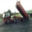

In [ ]:
# ARRAY
X_train[2]

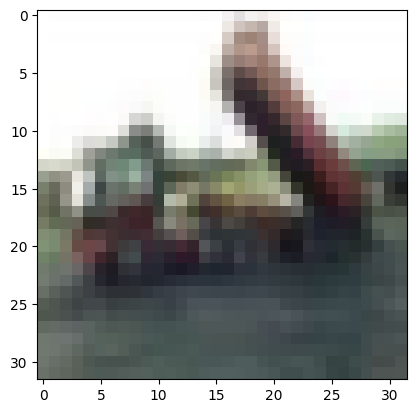

In [ ]:
plt.imshow(X_train[2])

In [ ]:

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshape the data to fit the model
X_train = X_train.reshape((len(X_train), 32, 32, 3))
X_test = X_test.reshape((len(X_test), 32, 32, 3))

# Define the autoencoder model
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 3)           │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,867 (34.64 KB)

 Trainable params: 8,867 (34.64 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',)

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 340ms/step - loss: 0.1629 - val_loss: 7.8272e-06
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 340ms/step - loss: 5.5065e-06 - val_loss: 2.9594e-06
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 301ms/step - loss: 2.7994e-06 - val_loss: 2.5894e-06
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 132s 337ms/step - loss: 2.5455e-06 - val_loss: 2.5008e-06
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 134s 316ms/step - loss: 2.4687e-06 - val_loss: 2.4355e-06
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 336ms/step - loss: 2.4009e-06 - val_loss: 2.3645e-06
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 326ms/step - loss: 2.3312e-06 - val_loss: 2.2842e-06
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 338ms/step - loss: 2.2490e-06 - val_loss: 2.1924e-06
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 344ms/step - loss: 2.1527e-06 - val_loss: 2.0876e-06
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 336ms/step - loss: 2.0427e-06 - val_loss: 1.9691e-06
Epoch 11/50
391/391 ━━━